In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

import matplotlib.pyplot as plt
import tikzplotlib
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [48]:
# Construct model
model = Sequential()
model.add(Dense(100, input_shape=[2,], activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Dense(100, activation='selu'))
model.add(Flatten())
model.add(Dense(1))

In [37]:
def theta2cart(theta_out, r): # converts random thetas and fixed r into x and y coordinates
    x_out = tf.math.scalar_mul(r, tf.math.cos(theta_out)) # x = 4cos(theta_in)
    y_out = tf.math.scalar_mul(r, tf.math.sin(theta_out)) # y = 4sin(theta_in)
    
    out_bnd_pts = tf.transpose(tf.stack([x_out,y_out],0))
    return out_bnd_pts

In [38]:
def out_bnd_fn(theta_out): # f(4,theta) = 4sin(5theta)
    f_true = tf.transpose(tf.math.scalar_mul(4, tf.math.sin(tf.math.scalar_mul(5,theta_out))))
    return f_true

In [39]:
def loss_fn(f_pred, theta_out): # loss_fn(model, [x,y], [theta_in], [theta_out])
#     f_pred = tf.squeeze(f_pred)
#     print("f_pred shape" ,tf.shape(f_pred))

# Find loss for outer boundary points #####################################################################
    f_true =  out_bnd_fn(theta_out)
#     f_true = tf.squeeze(f_true)
#     print("t_true shape", tf.shape(f_true))

# out_bnd_err = f(x,y)-4sin(5theta)

    loss = tf.keras.metrics.mean_squared_error(f_true,f_pred) # MSE outer bound points
    return loss

In [52]:
# Train network
def train_for():
    #Ftrl
    #Adam BAD
    #SGD BAD
    #Nadam BAD

# Define training parameters ##############################################################################    
    optimizer = tf.keras.optimizers.Ftrl(learning_rate=0.1) # Fancy gradient decent
    epochs = 200
    train_loss_results = [] # For tracking loss during training
    iterations_per_epoch = 100

    theta_out_size = 10 # Number of outer boundary points to sample each iteration

    for epoch in range(epochs):
        epoch_loss_avg = tf.keras.metrics.Mean()
        
        for iteration in range(iterations_per_epoch):
    
# Sample outer bound thetas ###############################################################################
            theta_out = tf.random.uniform([1,theta_out_size], minval=0, maxval=2*np.pi)
            out_bnd_pts = theta2cart(theta_out,4)
            
# Optimize the network with respect to hyperparameters ####################################################
            
            with tf.GradientTape() as t:
                f_pred = model(out_bnd_pts, training=True)
                loss = loss_fn(f_pred, theta_out) # Loss
            grads = t.gradient(loss, model.trainable_weights) # Find model gradients
            optimizer.apply_gradients(zip(grads, model.trainable_weights)) # Perform gradient decent
            epoch_loss_avg.update_state(loss) # Track loss
            #optimizer.minimize(loss_fn(model, theta_out), model.trainable_weights)
            # End training iteration
        train_loss_results.append(epoch_loss_avg.result())
        
        if epoch % 1 == 0:
            print("Epoch {:03d}: Loss: {:.3f}".format(epoch, epoch_loss_avg.result()))
        # End Epoch

In [53]:
train_for()

Epoch 000: Loss: 203400.141
Epoch 001: Loss: 6.279
Epoch 002: Loss: 3.016
Epoch 003: Loss: 2.365
Epoch 004: Loss: 1.781
Epoch 005: Loss: 1.586
Epoch 006: Loss: 1.531
Epoch 007: Loss: 1.521
Epoch 008: Loss: 1.261
Epoch 009: Loss: 1.347
Epoch 010: Loss: 1.064
Epoch 011: Loss: 1.083
Epoch 012: Loss: 1.010
Epoch 013: Loss: 0.986
Epoch 014: Loss: 1.030
Epoch 015: Loss: 1.038
Epoch 016: Loss: 0.798
Epoch 017: Loss: 0.810
Epoch 018: Loss: 0.797
Epoch 019: Loss: 0.726
Epoch 020: Loss: 0.872
Epoch 021: Loss: 0.710
Epoch 022: Loss: 0.639
Epoch 023: Loss: 0.590
Epoch 024: Loss: 0.616
Epoch 025: Loss: 0.564
Epoch 026: Loss: 0.580
Epoch 027: Loss: 0.550
Epoch 028: Loss: 0.551
Epoch 029: Loss: 0.582
Epoch 030: Loss: 0.504
Epoch 031: Loss: 0.529
Epoch 032: Loss: 0.489
Epoch 033: Loss: 0.426
Epoch 034: Loss: 0.453
Epoch 035: Loss: 0.448
Epoch 036: Loss: 0.456
Epoch 037: Loss: 0.407
Epoch 038: Loss: 0.452
Epoch 039: Loss: 0.461
Epoch 040: Loss: 0.503
Epoch 041: Loss: 0.391
Epoch 042: Loss: 0.369
Epoch 

In [54]:
# Generate test points to plot ############################################################################
out_bnd_pts_size = 1000 # Number of outer boundary points to sample 

# Sample outer boundary points ############################################################################
theta_out = tf.random.uniform([1, out_bnd_pts_size], minval=0, maxval=2*np.pi)
test_pts = theta2cart(theta_out,4)
# print(test_pts)
print("test_pts shape",tf.shape(test_pts))

z_pred = model(test_pts)
print("z_pred shape", tf.shape(z_pred))

z = out_bnd_fn(theta_out)
print("z shape",tf.shape(z))


test_pts shape tf.Tensor([1000    1    2], shape=(3,), dtype=int32)
z_pred shape tf.Tensor([1000    1], shape=(2,), dtype=int32)
z shape tf.Tensor([1000    1], shape=(2,), dtype=int32)


(1000,)
(1000,)
(1000,)


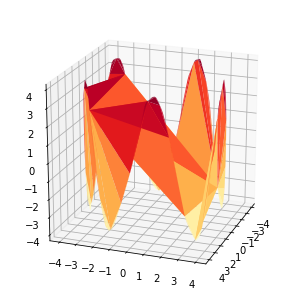

In [55]:
# Plot ####################################################################################################
fig = pylab.figure(figsize=plt.figaspect(1))
ax = Axes3D(fig)

X = test_pts[0:, 0, 0].numpy()
print(X.shape)
Y = test_pts[0:, 0, 1].numpy()
print(Y.shape)
Z = z_pred[0:, 0].numpy()
print(Z.shape)

ax.plot_trisurf(X,Y,Z, cmap=plt.cm.YlOrRd)
ax.view_init(20, 20)
plt.show()

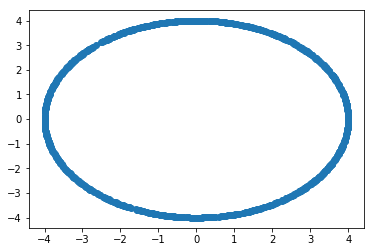

In [56]:
plt.scatter(X,Y)
plt.show()